In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [256]:
img1 = cv2.imread('HOG/test/20171118_133018.jpg', 0)  # query Image
img1 = cv2.equalizeHist(img1)
img1 = img1[0:350,:]

img2 = cv2.imread('HOG/train/f4.jpg', 0)               # trainImage
#img2 = cv2.resize(img2, (120, 120))
#img2 = cv2.equalizeHist(img2)

#plt.figure(figsize = (15,10))
#plt.imshow(img2, cmap="gray")

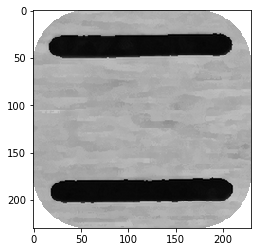

In [259]:
#img2.shape
#img2 = imutils.auto_canny(img2)
#sobely = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=3)
#abs_sobel64f = np.absolute(sobely)
#sobel_8u = np.uint8(abs_sobel64f)
#print(np.unique(img2))

#img2[img2 <= 40] = 0
#img2[img2 > 40] = 255
plt.imshow(img2, cmap="gray")

In [238]:
clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img1 = clahe1.apply(img1)
img2 = clahe2.apply(img2)

In [253]:
# Initiate SIFT detector
#sift = cv2.xfeatures2d.SURF_create#cv2.SIFT()
#sift = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [240]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

In [254]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
len(matches)

104

In [242]:
img3 = np.zeros(img2.shape) 
img4 = cv2.drawMatches(img1,kp1,img2,kp2,matches, outImg=img3, flags=2)
#img4 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], outImg=img3, flags=2)

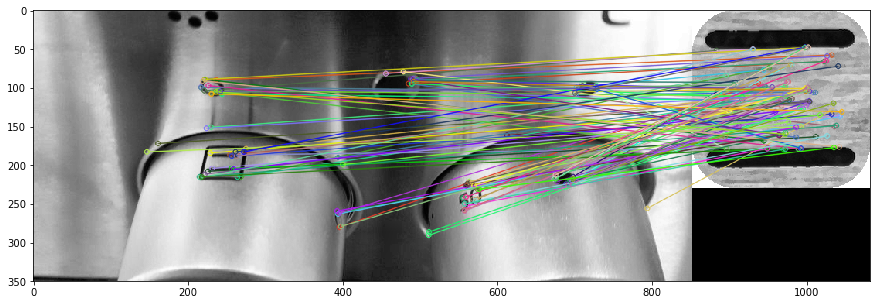

In [243]:
plt.figure(figsize = (15,10))
plt.imshow(img4)